# Environment Setup

In [1]:
from distutils.version import StrictVersion

In [2]:
!conda install --name root scikit-learn -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_431:

The following packages will be UPDATED:

    conda:        4.3.25-py36_0                             --> 4.3.27-py36h2866c0b_0

The following packages will be SUPERSEDED by a higher-priority channel:

    scikit-learn: 0.19.0-py36_blas_openblas_201 conda-forge [blas_openblas] --> 0.18.1-np111py36_1   

scikit-learn-0 100% |################################| Time: 0:00:00  20.50 MB/s
conda-4.3.27-p 100% |################################| Time: 0:00:00  55.40 MB/s


In [3]:
!conda install --name root matplotlib -y

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/nbcommon/anaconda3_431:
#
matplotlib                2.0.2                    py36_2    conda-forge


In [4]:
import sklearn
assert(StrictVersion(sklearn.__version__) >= StrictVersion('0.18.1'))

sklearn.__version__

'0.19.0'

In [ ]:
!conda install --name root -c conda-forge tensorflow -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_431:

The following packages will be UPDATED:

    scikit-learn: 0.19.0-py36h97ac459_2 --> 0.19.0-py36_blas_openblas_201 conda-forge [blas_openblas]

The following packages will be SUPERSEDED by a higher-priority channel:

    conda:        4.3.27-py36h2866c0b_0 --> 4.3.27-py36_0                 conda-forge
    conda-env:    2.6.0-h36134e3_1      --> 2.6.0-0                       conda-forge



In [26]:
import tensorflow as tf
assert(StrictVersion(tf.__version__) >= StrictVersion('1.0.0'))
tf.__version__

'1.3.0'

In [19]:
!conda install --name root keras -y

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /home/nbcommon/anaconda3_431:

The following packages will be UPDATED:

    conda-env: 2.6.0-0       conda-forge --> 2.6.0-h36134e3_1     

The following packages will be SUPERSEDED by a higher-priority channel:

    conda:     4.3.27-py36_0 conda-forge --> 4.3.27-py36h2866c0b_0



In [27]:
import keras
assert(StrictVersion(tf.__version__) >= StrictVersion('1.2.2'))
keras.__version__

'2.0.5'

In [28]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from keras import backend as K

# Data loading

In [37]:
# Load pre-shuffled MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Populating the interactive namespace from numpy and matplotlib


/home/nbuser/anaconda3_431/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axis']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


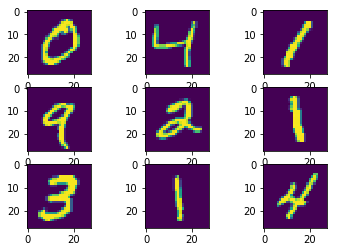

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

fig = plt.figure()
rows = 3
cols = 3
for i in range(1,rows+1):
    for j in range(1,cols+1):    
        axis = fig.add_subplot(rows,cols,rows*(i-1)+j)
        axis.imshow(X_train[rows*(i-1)+j])


# Hyperpaprameters

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# Data preprocess

In [40]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Model

In [ ]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Building model

In [41]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


# Training

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Test / Evaluation

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])